### **Optimal control**

In [1]:
from gekko import GEKKO
import numpy as np
import matplotlib.pyplot as plt 

Problem:

$$ min_u:  \frac{1}{2}\int_{0}^{2} x_1^2(t) dt$$

Subject to:

$\frac{dx_1}{dt} = u$

$x_1(0) = 1$

$-1 < u(t) < 1$

This problem can be re-written as:
$$ min_u : x_2(t_f)$$

Subject to:

$\frac{dx_1}{dt} = u$

$\frac{dx_2}{dt} = \frac{1}{2}x_1^2$

$x_1(0) = 1$

$x_2(0) = 0$

$tf = 2$


$-1 < u(t) < 1$

apm 129.97.124.26_gk_model1 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            0
   Equations    :            3
   Residuals    :            3
 
 Number of state variables:            500
 Number of total equations: -          400
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            100
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

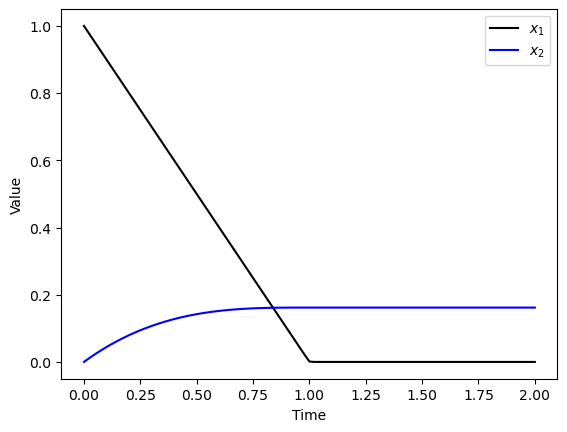

In [4]:
m = GEKKO() # initialize gekko
nt = 101 # Number of time-steps
m.time = np.linspace(0,2,nt)

# Variables
x1 = m.Var(value=1)
x2 = m.Var(value=0)
u = m.Var(value=0,lb=-1,ub=1)

p = np.zeros(nt) # mark final time point
p[-1] = 1.0
final = m.Param(value=p)

# Equations
m.Equation(x1.dt()==u)
m.Equation(x2.dt()==0.5*x1**2)
m.Obj(x2*final) # Objective function

m.options.IMODE = 6 # optimal control mode and dynamic optimization
m.solve(disp=True) # solve

plt.plot(m.time,x1.value,'k-',label=r'$x_1$')
plt.plot(m.time,x2.value,'b-',label=r'$x_2$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

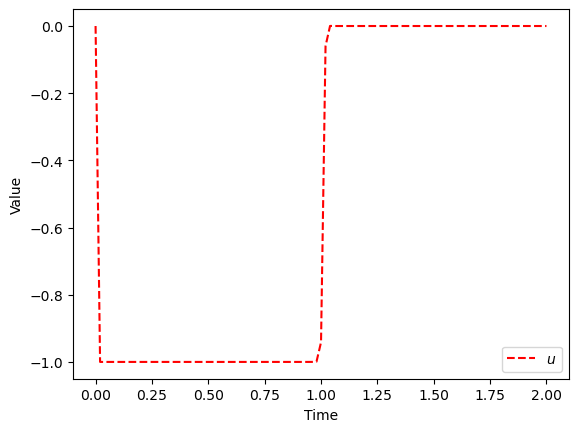

In [3]:
plt.plot(m.time,u.value,'r--',label=r'$u$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()